# WeatherPy
----

#### Notes
* There does not appear to be a relationship between humidity, cloudiness, or wind speed and latitude.
* There does appear to be a relationship between latitude and max temperature. While temperatures generally got higher as they approached the equator, the highest temperatures were between 20 and 40 degrees latitude.  This is most likely due to the data being generated in July which is summer in the northern hemisphere.
* While there was no correlation between latitude and cloudiness, the percentages of cloudiness tended to hover around the 0(no clouds) and 100(all clouds) and the other axes such as 20, 40, and 80 percent.  This could be attributed to the fact that cloudiness percentage is a subjective measure and people like round numbers.  

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [53]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


,City
0,grenaa
1,billings
2,new norfolk
3,tiksi
4,port hedland


In [57]:
# Creating Data Frame

city_data = pd.DataFrame({"City": cities})
city_data["Cloudiness"] = ""
city_data["Country"] = ""
city_data["Date"] = ""
city_data["Humidity"] = ""
city_data["Lat"] = ""
city_data["Lng"] = ""
city_data["Max Temp"] = ""
city_data["Wind Speed"] = ""
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,grenaa,,,,,,,,
1,billings,,,,,,,,
2,new norfolk,,,,,,,,
3,tiksi,,,,,,,,
4,port hedland,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [114]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


print('Beginning Data Retrieval') 
print('-----------------------------')
    
for index, row in city_data.iterrows():   
    #get city from df
    city = row['City']
    
    # assemble url and make API request
    print(f"Processing Record {index}| {city}.")
    response = requests.get(query_url + city).json()
    
    # extract results
#     results = response['results']
    
    try:  
        city_data.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_data.loc[index, 'Country'] = response['sys']['country']
        city_data.loc[index, 'Date'] = response['dt']
        city_data.loc[index, 'Humidity'] = response['main']['humidity']
        city_data.loc[index, 'Lat'] = response['coord']['lat']
        city_data.loc[index, 'Lng'] = response['coord']['lon']
        city_data.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_data.loc[index, 'Wind Speed'] = response['wind']['speed']
        
    except (KeyError, NameError):
        print('City not found. Skipping...')
    


Beginning Data Retrieval
-----------------------------
Processing Record 0| grenaa.
Processing Record 1| billings.
Processing Record 2| new norfolk.
Processing Record 3| tiksi.
Processing Record 4| port hedland.
Processing Record 5| ust-bolsheretsk.
City not found. Skipping...
Processing Record 6| port alfred.
Processing Record 7| cape town.
Processing Record 8| cabo san lucas.
Processing Record 9| east london.
Processing Record 10| tuktoyaktuk.
Processing Record 11| kapaa.
Processing Record 12| mnogovershinnyy.
Processing Record 13| punta arenas.
Processing Record 14| nizhneyansk.
City not found. Skipping...
Processing Record 15| sibolga.
Processing Record 16| karkaralinsk.
City not found. Skipping...
Processing Record 17| albany.
Processing Record 18| shubarshi.
Processing Record 19| sterling.
Processing Record 20| madang.
Processing Record 21| avarua.
Processing Record 22| hilo.
Processing Record 23| fenelon falls.
Processing Record 24| nikolskoye.
Processing Record 25| rikitea.
Pro

Processing Record 230| pangody.
Processing Record 231| mutsamudu.
City not found. Skipping...
Processing Record 232| amahai.
Processing Record 233| abha.
Processing Record 234| honavar.
Processing Record 235| katsuura.
Processing Record 236| zhigansk.
Processing Record 237| almaznyy.
Processing Record 238| shimoda.
Processing Record 239| shubarkuduk.
Processing Record 240| tazmalt.
Processing Record 241| cidreira.
Processing Record 242| kavieng.
Processing Record 243| vostochnyy.
Processing Record 244| umzimvubu.
City not found. Skipping...
Processing Record 245| san vicente.
Processing Record 246| fairbanks.
Processing Record 247| najran.
Processing Record 248| hargeysa.
Processing Record 249| shahr-e babak.
Processing Record 250| gazli.
Processing Record 251| mogadishu.
Processing Record 252| bengkulu.
City not found. Skipping...
Processing Record 253| upernavik.
Processing Record 254| qaqortoq.
Processing Record 255| beloha.
Processing Record 256| gazojak.
Processing Record 257| kie

Processing Record 460| soligalich.
Processing Record 461| athabasca.
Processing Record 462| mandalgovi.
Processing Record 463| vangaindrano.
Processing Record 464| port hardy.
Processing Record 465| minab.
Processing Record 466| fonte boa.
Processing Record 467| san rafael.
Processing Record 468| skoghall.
Processing Record 469| yarada.
Processing Record 470| grand gaube.
Processing Record 471| sitka.
Processing Record 472| la primavera.
Processing Record 473| honningsvag.
Processing Record 474| okhotsk.
Processing Record 475| erzincan.
Processing Record 476| oksfjord.
Processing Record 477| irimbo.
Processing Record 478| gurskoye.
City not found. Skipping...
Processing Record 479| kawhia.
Processing Record 480| kramat.
Processing Record 481| anadyr.
Processing Record 482| same.
Processing Record 483| gotsu.
Processing Record 484| tunduru.
City not found. Skipping...
Processing Record 485| merritt.
Processing Record 486| luanda.
Processing Record 487| ainring.
Processing Record 488| an

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [115]:

city_data.to_csv(
    "../starter_code/city_weather_data.csv", encoding="utf-8", index=False)


city_data["Cloudiness"] = pd.to_numeric(city_data["Cloudiness"])
city_data["Humidity"] = pd.to_numeric(city_data["Humidity"])
city_data["Lat"]= pd.to_numeric(city_data["Lat"])
city_data["Lng"] = pd.to_numeric(city_data["Lng"])
city_data["Max Temp"] = pd.to_numeric(city_data["Max Temp"])
city_data["Wind Speed"] = pd.to_numeric(city_data["Wind Speed"])
city_data.head()



,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,grenaa,100.0,DK,1563479649,68.0,56.42,10.88,68.00,4.70
1,billings,20.0,US,1563479649,30.0,45.79,-108.50,84.00,8.05
2,new norfolk,20.0,AU,1563479649,65.0,-42.78,147.06,55.99,17.22
3,tiksi,94.0,RU,1563479650,84.0,71.64,128.87,37.49,10.67
4,port hedland,98.0,AU,1563479650,58.0,-20.31,118.58,55.40,6.93


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

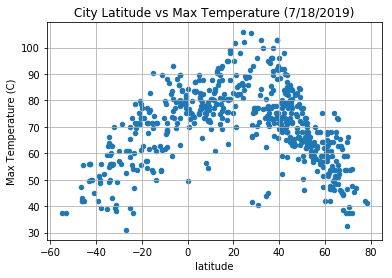

In [117]:
city_data.plot(kind="scatter", x="Lat", y="Max Temp", grid=True,
              title="City Latitude vs Max Temperature (7/18/2019)")


plt.xlabel("latitude")
plt.ylabel("Max Temperature (C)")

plt.savefig('LatitudevsMaxTemp.png')
plt.show()

#### Latitude vs. Humidity Plot

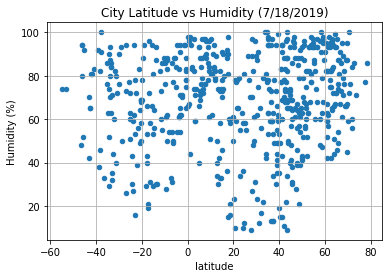

In [118]:
city_data.plot(kind="scatter", x="Lat", y="Humidity", grid=True,
              title="City Latitude vs Humidity (7/18/2019)")


plt.xlabel("latitude")
plt.ylabel("Humidity (%)")

plt.savefig('LatitudevsHumidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

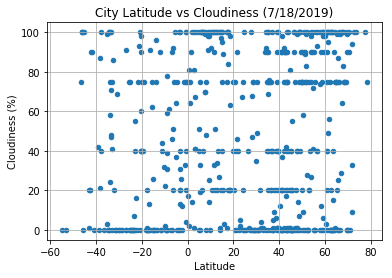

In [119]:
city_data.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True,
              title="City Latitude vs Cloudiness (7/18/2019)")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig('LatitudevsCloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

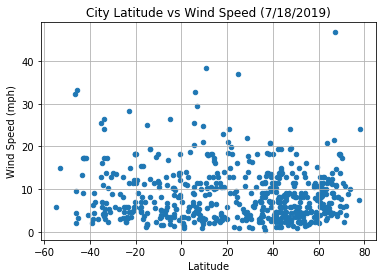

In [120]:
city_data.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True,
              title="City Latitude vs Wind Speed (7/18/2019)")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig('LatitudevsWindSpeed.png')
plt.show()